# Анализ базы данных сервиса для чтения книг по подписке.

## Описание проекта и цели исследования

**Описание данных**

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Компания купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Задача**

Сформулировать ценностное предложение для нового продукта.

**Цели исследования:**

1. проанализировать базу данных о книгах
2. проанализировать информацию об издательствах
3. оценить пользовательские обзоры книг, авторов

**Описание данных**

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

## Исследуйте таблицы — выведите первые строки

In [20]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
query = '''SELECT *
FROM books'''
books = pd.io.sql.read_sql(query, con = engine) 
display(books.head(5))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [4]:
query = '''SELECT *
FROM authors'''
authors = pd.io.sql.read_sql(query, con = engine) 
display(authors.head(5))

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [6]:
query = '''SELECT *
FROM publishers'''
publishers = pd.io.sql.read_sql(query, con = engine) 
display(publishers.head(5))

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [7]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [8]:
query = '''SELECT *
FROM ratings'''
ratings = pd.io.sql.read_sql(query, con = engine) 
display(ratings.head(5))

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [10]:
query = '''SELECT *
FROM reviews'''
reviews = pd.io.sql.read_sql(query, con = engine) 
display(reviews.head(5))

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


## Посчитайте, сколько книг вышло после 1 января 2000 года

In [12]:
query = '''SELECT COUNT(book_id)
FROM books
WHERE DATE(publication_date) >= '2000-01-01';'''
data_1 = pd.io.sql.read_sql(query, con = engine) 
display(data_1)

,count
0,821


### Вывод

После 1 января 2000 года(включительно) вышла 821 книга.

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [13]:
query = '''SELECT b.title,
AVG(rat.rating) AS avg_rating,
COUNT(DISTINCT rev.review_id) AS count_review
FROM books AS b
LEFT JOIN ratings AS rat ON b.book_id=rat.book_id
LEFT JOIN reviews AS rev ON b.book_id=rev.book_id
GROUP BY b.title
ORDER BY COUNT(DISTINCT rev.review_id) DESC;'''
data_2 = pd.io.sql.read_sql(query, con = engine) 
display(data_2.head(20))

,title,avg_rating,count_review
0,Memoirs of a Geisha,4.138462,8
1,Twilight (Twilight #1),3.662500,7
2,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
3,The Glass Castle,4.206897,6
4,Eat Pray Love,3.395833,6
5,The Curious Incident of the Dog in the Night-Time,4.081081,6
6,Water for Elephants,3.977273,6
7,Outlander (Outlander #1),4.125000,6
8,The Road,3.772727,6
9,The Alchemist,3.789474,6


Text(0, 0.5, 'Число книг')

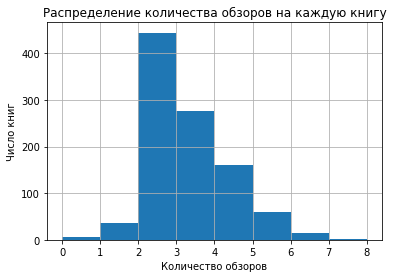

In [24]:
data_2['count_review'].hist(bins=8)
plt.title('Распределение количества обзоров на каждую книгу')
plt.xlabel("Количество обзоров")
plt.ylabel("Число книг")

Text(0, 0.5, 'Число книг')

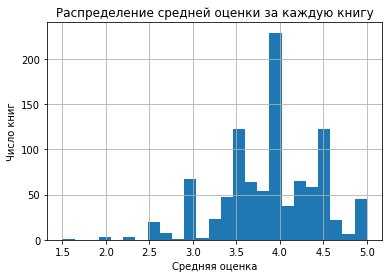

In [33]:
data_2['avg_rating'].hist(bins=25)
plt.title('Распределение средней оценки за каждую книгу')
plt.xlabel("Средняя оценка")
plt.ylabel("Число книг")

### Вывод

Количество обзоров и средняя оценка рассчитаны.

Больше всего обзоров на книги Memoirs of a Geisha - 8шт. и Twilight - 7.

Средняя оценка колеблется от 1,50 до 5.

## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [15]:
query = '''SELECT p.publisher,
COUNT(b.book_id)
FROM publishers AS p
RIGHT JOIN books AS b ON p.publisher_id=b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(b.book_id) DESC;'''
data_3 = pd.io.sql.read_sql(query, con = engine) 
display(data_3.head(10))

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,St. Martin's Press,14
8,Berkley Books,14
9,Delta,13


### Вывод

Наибольшее число книг толще 50 страниц выпустило издательство Penguin Books - 42 штуки.

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [16]:
query = '''WITH books_50 AS (SELECT b.book_id,
b.title,
b.author_id,
COUNT(rat.rating_id)
FROM books AS b
LEFT JOIN ratings AS rat ON b.book_id=rat.book_id
GROUP BY b.book_id
HAVING COUNT(rat.rating_id) >= 50
ORDER BY COUNT(rat.rating_id) DESC)
SELECT a.author,
AVG(rat.rating) 
FROM authors AS a
RIGHT JOIN books_50 AS b50 ON a.author_id=b50.author_id
LEFT JOIN ratings AS rat ON b50.book_id=rat.book_id
GROUP BY a.author
ORDER BY AVG(rat.rating) DESC;'''
data_4 = pd.io.sql.read_sql(query, con = engine) 
display(data_4)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.246914
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Lois Lowry,3.750000


### Вывод

Автор с самой высокой средней оценкой книг - J.K. Rowling/Mary GrandPré. Средняя оценка - 4,29.

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [17]:
query = '''WITH result AS (WITH us AS (SELECT rat.username,
COUNT(rat.rating_id) as count
FROM ratings AS rat
GROUP BY rat.username
HAVING COUNT(rat.rating_id) >= 50)
SELECT rev.username,
COUNT(rev.review_id)
FROM reviews AS rev
RIGHT JOIN us ON rev.username=us.username
GROUP BY rev.username)
SELECT AVG(result.count)
FROM result;'''
data_5 = pd.io.sql.read_sql(query, con = engine) 
display(data_5)

,avg
0,24.222222


### Вывод

Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24 штуки.

## Общий вывод

1. После 1 января 2000 года(включительно) вышла 821 книга.
2. Больше всего обзоров на книги Memoirs of a Geisha - 8шт. и Twilight - 7. По общей статистике более 450 книг с 3 обзорами, около 275 - по 4 обзора и около 150 книг - по 5 обзоров.
3. Средняя оценка колеблется от 1,50 до 5.Чаще всего она близка к 4(более 200 книг) и более 100 книг имеют среднюю оценку 4,5, и промерно столько же - 3,5.
4. Наибольшее число книг толще 50 страниц выпустило издательство Penguin Books - 42 штуки.
5. Авторы с наиболее высокими оценками: J.K. Rowling/Mary GrandPré - 4.29;  Markus Zusak/Cao Xuân Việt Khương - 4.26 и J.R.R. Tolkien - 4.25.
6. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24 штуки.